# ANALYSIS
1.With the Temperature and the latitude scatter plot, there is a positive correlation ie 
    an increase in temp increses lat
2.The average wind speed for all cities is fairly low in the winds speed and latitude 
    scatter plot
3.The wind speed are higher on average on the north and south poles.

In [74]:
import pandas as pd
from citipy import citipy
import numpy as np
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Locate Nearest City

In [75]:
#generate random list for latitudes and longitudes 

latitude = []
longitude = []

for each_lat in np.random.randint(-90,90,2000):
    latitude.append(each_lat)

for each_lon in np.random.randint(-180,180,2000):
    longitude.append(each_lon)

# Generate Dataframe for all latitudes and longitudes

In [76]:
#Create and variable called latitude_and_Longitude and store all random latitudes and longitudes generated

latitude_and_Longitude = tuple(zip(latitude,longitude))

In [77]:
#use citipy library to find the nearest city for all latitudes and longitudes

cities = []
country = []

for lat,lon in latitude_and_Longitude:
    city = citipy.nearest_city(lat,lon)
    
    cityName = city.city_name
    
    cities.append(cityName)
    
    country.append(city.country_code)

In [78]:
#Print out how many the different cities were generated

print('The above script has generated {} different cities using random numbers.'.format(len(set(cities))))

The above script has generated 786 different cities using random numbers.


In [79]:
#create a dataframe to store all the cities and countries generated with citipy

df_countries = pd.DataFrame({'Cities': cities,
              'Country': country})

#add additional blank columns to store information from openweathermap api

df_countries['Latitude'] = ''
df_countries['Longitude'] = ''
df_countries['Temperature (F)'] = ''
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ''
df_countries['Wind Speed (mph)'] = ''

In [80]:
#drop all duplicates in column Cities.

df_countries = df_countries.drop_duplicates(subset=['Cities'],keep='first')

#api key used with openweathermap api

api_key = "5be78fade1727ace968b5ab363d997bd"

# Use Openweathermap API

#loop through all rows and fill in values for blank columns in dataframe

for index,row in df_countries.iterrows():
    city_name = row['Cities']
    Country_id = row['Country']
    
    
    #api call for all Cities 
    api_url = "http://api.openweathermap.org/data/2.5/forecast" \
    "?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(city_name,Country_id,api_key)
    
    
    country_info = requests.get(api_url).json()
    
    #print all api url's for each city
    print(api_url)
    
    
    try:
        df_countries.set_value(index,'Latitude',country_info['city']['coord']['lat'])
        df_countries.set_value(index,'Longitude',country_info['city']['coord']['lon'])
        df_countries.set_value(index,'Temperature (F)',country_info['list'][0]['main']['temp'])
        df_countries.set_value(index,'Humidity (%)',country_info['list'][0]['main']['humidity'])
        df_countries.set_value(index,'Cloudiness (%)',country_info['list'][0]['clouds']['all'])
        df_countries.set_value(index,'Wind Speed (mph)',country_info['list'][0]['wind']['speed'])
        
    except KeyError:
        df_countries.set_value(index,'Latitude',np.nan)
        df_countries.set_value(index,'Longitude',np.nan)
        df_countries.set_value(index,'Temperature (F)',np.nan)
        df_countries.set_value(index,'Humidity (%)',np.nan)
        df_countries.set_value(index,'Cloudiness (%)',np.nan)
        df_countries.set_value(index,'Wind Speed (mph)',np.nan)
        
        print('Missing weather information...skip')

#change all data recieved from openweathermap api to numerical data
df_countries['Latitude'] = pd.to_numeric(df_countries['Latitude'])
df_countries['Longitude'] = pd.to_numeric(df_countries['Longitude'])
df_countries['Temperature (F)'] = pd.to_numeric(df_countries['Temperature (F)'])
df_countries['Humidity (%)'] = pd.to_numeric(df_countries['Humidity (%)'])
df_countries['Cloudiness (%)'] = pd.to_numeric(df_countries['Cloudiness (%)'])
df_countries['Wind Speed (mph)'] = pd.to_numeric(df_countries['Wind Speed (mph)'])

http://api.openweathermap.org/data/2.5/forecast?q=harper,lr&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:33: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel/_

http://api.openweathermap.org/data/2.5/forecast?q=tuktoyaktuk,ca&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=hilo,us&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=pathardi,in&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=new waterford,ca&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=westwood,us&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=hermanus,za&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=puerto rico,co&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=tam ky,vn&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:39: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:40: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:41: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel/_

http://api.openweathermap.org/data/2.5/forecast?q=yantzaza,ec&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=taolanaro,mg&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=kuytun,cn&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=dikson,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=ambodifototra,mg&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=katsuura,jp&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=mount gambier,au&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http:/

http://api.openweathermap.org/data/2.5/forecast?q=castro,cl&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=zhangye,cn&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=mujiayingzi,cn&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=gat,ly&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=husavik,is&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=bambous virieux,mu&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=tursunzoda,tj&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=sao joao da barra,br&units=IMP

http://api.openweathermap.org/data/2.5/forecast?q=chokurdakh,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=dondo,mz&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=lodja,cd&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=sept-iles,ca&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=provideniya,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=mys shmidta,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=vieques,us&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecas

http://api.openweathermap.org/data/2.5/forecast?q=san lawrenz,mt&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=belushya guba,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=sao filipe,cv&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=shakawe,bw&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=jashpurnagar,in&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=port elizabeth,za&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=sentyabrskiy,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap

http://api.openweathermap.org/data/2.5/forecast?q=georgetown,sh&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=roebourne,au&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=sitka,us&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=urucara,br&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=tabiauea,ki&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=caravelas,br&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=karaul,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=

http://api.openweathermap.org/data/2.5/forecast?q=can,tr&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=tiksi,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=mutis,co&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=hervey bay,au&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=ambulu,id&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=umarkot,in&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=jaguarari,br&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=iquique,cl&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http

http://api.openweathermap.org/data/2.5/forecast?q=sijunjung,id&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=bonthe,sl&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=amderma,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=omsukchan,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=ngukurr,au&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=kudahuvadhoo,mv&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=sabzevar,ir&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecas

http://api.openweathermap.org/data/2.5/forecast?q=charters towers,au&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=cayenne,gf&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=ouegoa,nc&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=klaksvik,fo&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=loukhi,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=paso de los toros,uy&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=cheremukhovo,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=tandalti,sd&units=IMPERIAL&mode=json&APPID=5be78fade1

http://api.openweathermap.org/data/2.5/forecast?q=korla,cn&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=nuevitas,cu&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=constantine,dz&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=sines,pt&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=jiexiu,cn&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=bargal,so&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=wembley,ca&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=denpasar,id&units=IMPERIAL&mode=json&APPI

http://api.openweathermap.org/data/2.5/forecast?q=hikari,jp&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=leningradskiy,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=harmanli,bg&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=chichibu,jp&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=butia,br&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=alugan,ph&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=kalianget,id&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=axim,gh&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997

http://api.openweathermap.org/data/2.5/forecast?q=shevchenkove,ua&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=mao,td&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=sri aman,my&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=meadow lake,ca&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=bereda,so&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=les cayes,ht&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=ishigaki,jp&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=dolbeau,ca&units=IMPERIAL&mode=j

http://api.openweathermap.org/data/2.5/forecast?q=trelew,ar&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=mogok,mm&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=broken hill,au&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=hualmay,pe&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=autun,fr&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=vera cruz,br&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=yangjiang,cn&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=jardim,br&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997b

http://api.openweathermap.org/data/2.5/forecast?q=togur,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=khuzhir,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=gavle,se&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=entre rios,br&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=maykor,ru&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=frunze,ua&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
http://api.openweathermap.org/data/2.5/forecast?q=tiruvottiyur,in&units=IMPERIAL&mode=json&APPID=5be78fade1727ace968b5ab363d997bd
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=victor harbor,au&units=IMPERIAL&mode=j

In [81]:
#display dataframe df_countries after openweathermap api calls 
df_countries.head()


,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,harper,lr,4.3770,-7.7141,81.88,100.0,64.0,10.00
1,tuktoyaktuk,ca,69.4440,-133.0320,-2.75,100.0,8.0,4.74
2,hilo,us,19.7072,-155.0817,78.01,100.0,68.0,15.03
3,pathardi,in,19.1717,75.1746,69.26,61.0,0.0,6.53
4,new waterford,ca,46.2501,-60.0818,36.70,81.0,68.0,16.60


In [82]:
length_of_original_DF = len(df_countries)
length_after_dropna = len(df_countries.dropna())

missing_weather_info = length_of_original_DF - length_after_dropna

In [83]:
print('For the following cities associated with this dataframe, {} cities did not contain weather\
 information. These cities\t will be dropped from this dataframe.'.format(missing_weather_info))

print('\n')

print("The dataframe used for plotting contains weather information for {} different cities. "\
      .format(len(df_countries.dropna())))

For the following cities associated with this dataframe, 96 cities did not contain weather information. These cities	 will be dropped from this dataframe.


The dataframe used for plotting contains weather information for 690 different cities. 


In [84]:
df_countries = df_countries.dropna()
df_countries.to_csv(path_or_buf='df_countries.csv')

In [85]:
df_countries_table = df_countries.copy()
df_countries_table['Latitude'] = pd.qcut(df_countries['Latitude'],11,precision=0)

In [86]:
cm = sns.light_palette('green',as_cmap=True)

df_countries_table.groupby(['Latitude'])['Temperature (F)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Temperature (F)
0,"(-56.0, -32.0]",59.2757
1,"(-32.0, -19.0]",69.2494
2,"(-19.0, -5.0]",73.5802
3,"(-5.0, 6.0]",77.0794
4,"(6.0, 18.0]",76.7459
5,"(18.0, 29.0]",74.9052
6,"(29.0, 37.0]",61.0656
7,"(37.0, 46.0]",50.6846
8,"(46.0, 53.0]",42.7377
9,"(53.0, 63.0]",36.5708


In [87]:
#plot the following plots Temperature (F) vs. Lat, Humidity (%) vs. Lat, Cloudiness (%) vs. Lat, and 
#Wind Speed (mph) vs. Lat

plt.style.use('dark_background')

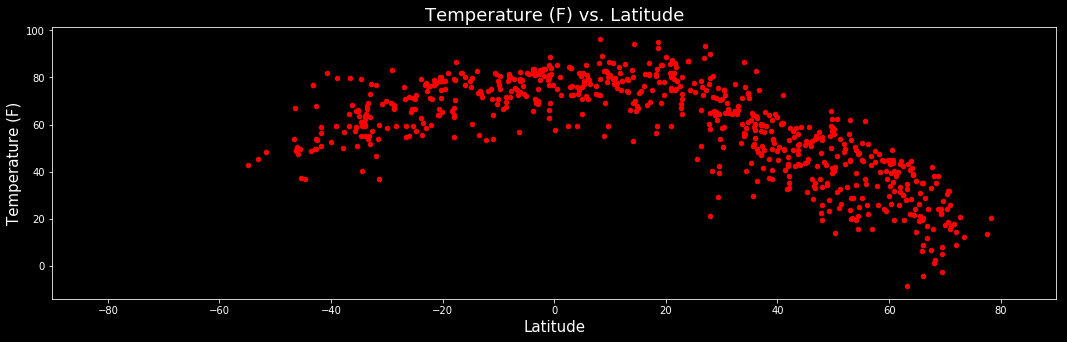

In [88]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Temperature (F)'],color = 'red',s=20)
plt.title('Temperature (F) vs. Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Temperature (F)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));
plt.show()

In [89]:
plt.savefig('sam1.png')

In [90]:
df_countries_table.groupby(['Latitude'])['Humidity (%)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Humidity (%)
0,"(-56.0, -32.0]",83.6032
1,"(-32.0, -19.0]",85.6349
2,"(-19.0, -5.0]",86.7581
3,"(-5.0, 6.0]",93.9048
4,"(6.0, 18.0]",81.0635
5,"(18.0, 29.0]",64.5645
6,"(29.0, 37.0]",73.6508
7,"(37.0, 46.0]",73.746
8,"(46.0, 53.0]",70.7581
9,"(53.0, 63.0]",79.5714


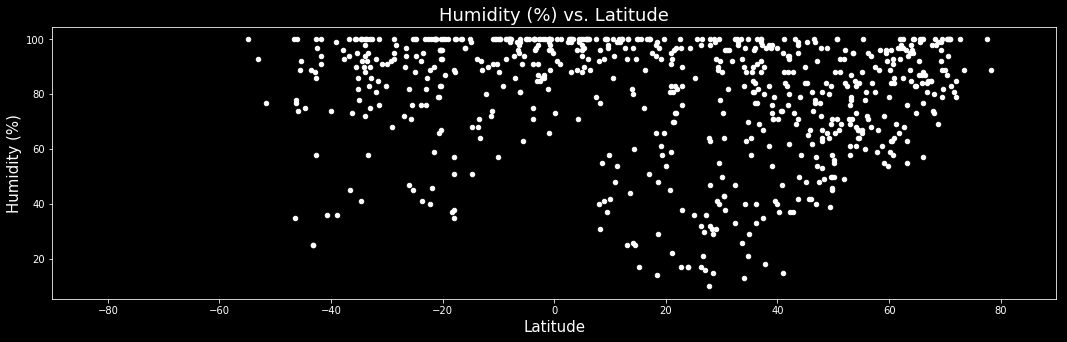

In [91]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Humidity (%)'],color = 'white',s=20);
plt.title('Humidity (%) vs. Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Humidity (%)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [92]:
plt.savefig('sam.png')

In [93]:
df_countries_table.groupby(['Latitude'])['Cloudiness (%)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Cloudiness (%)
0,"(-56.0, -32.0]",29.6508
1,"(-32.0, -19.0]",33.8413
2,"(-19.0, -5.0]",41.7419
3,"(-5.0, 6.0]",51.8095
4,"(6.0, 18.0]",30.9841
5,"(18.0, 29.0]",30.7097
6,"(29.0, 37.0]",31.619
7,"(37.0, 46.0]",39.4286
8,"(46.0, 53.0]",24.7097
9,"(53.0, 63.0]",53.6508


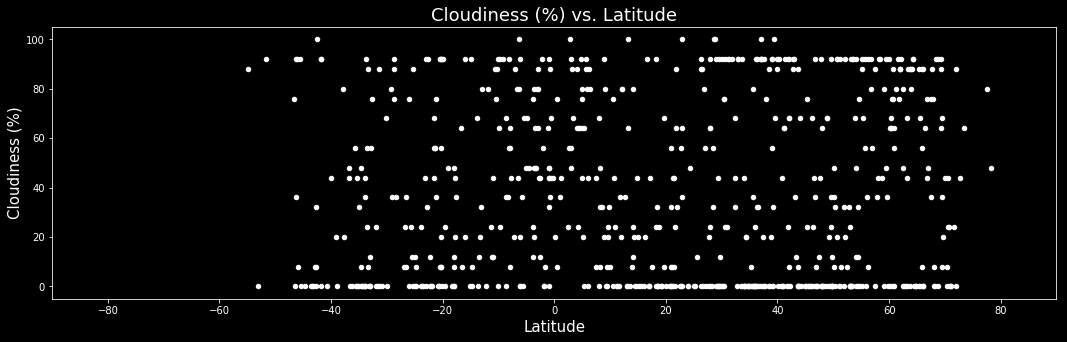

In [94]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Cloudiness (%)'],color = 'w',s=20);
plt.title('Cloudiness (%) vs. Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Cloudiness (%)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [95]:
plt.savefig('sam3.png')

In [96]:
df_countries_table.groupby(['Latitude'])['Wind Speed (mph)'].mean().reset_index().style.background_gradient(cmap=cm)

,Latitude,Wind Speed (mph)
0,"(-56.0, -32.0]",10.8692
1,"(-32.0, -19.0]",7.42444
2,"(-19.0, -5.0]",6.6021
3,"(-5.0, 6.0]",5.81111
4,"(6.0, 18.0]",7.72508
5,"(18.0, 29.0]",8.53242
6,"(29.0, 37.0]",6.50508
7,"(37.0, 46.0]",7.18222
8,"(46.0, 53.0]",8.98677
9,"(53.0, 63.0]",8.53603


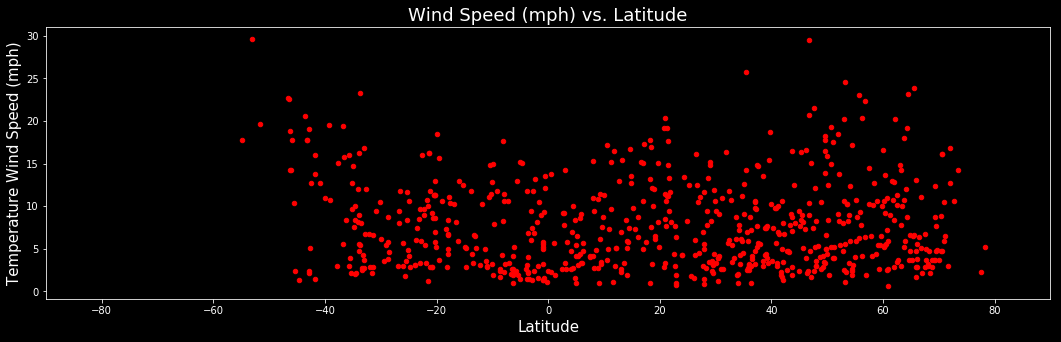

In [97]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries['Latitude'],df_countries['Wind Speed (mph)'],color = 'red',s=20);
plt.xlim(-90,90)
plt.title('Wind Speed (mph) vs. Latitude',fontsize=(18));
plt.ylabel('Temperature Wind Speed (mph)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [98]:
plt.savefig('sam4.png')


In [99]:
print("The average wind speed is {} mph for all randomly selected cities".format(df_countries['Wind Speed (mph)'].mean()))

The average wind speed is 7.797492753623169 mph for all randomly selected cities
